In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

C:\Users\StrikeWade\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
#Parameters
learning_rate=0.01
training_epochs = 1000
display_steps = 50

In [9]:
#Training data
x_train = np.array(np.random.uniform(low=-1.0, high=1.0, size=20))
y_train = np.array(np.random.uniform(low=-1.0, high=1.0, size=20))
n_samples = x_train.shape[0]
n_samples
x_train

array([ 0.0323087 , -0.99459131,  0.09926869, -0.88396528,  0.31857903,
       -0.72740187,  0.55152933, -0.25434108, -0.36169677, -0.55722995,
        0.83367098,  0.88328136, -0.81754174,  0.64379908, -0.31220072,
       -0.64883013, -0.12012818, -0.01157285,  0.1808919 , -0.78316092])

In [10]:
#tf Graph Input
x = tf.placeholder(dtype='float32')
y = tf.placeholder(dtype='float32')

#Set model weights
W = tf.Variable(np.random.randn(), name='weight')
b = tf.Variable(np.random.randn(), name='bias')

In [11]:
#Construct a Linear model
prediction = tf.add(tf.multiply(x,W),b)

In [12]:
#Mean Squared error
loss = tf.reduce_sum(tf.pow(prediction-y,2)) / (2*n_samples)
#Gradient decent
my_optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)
# my_optimizer = tf.contrib.estimator.clip_gradients_by_norm(optimizer=my_optimizer,clip_norm=5.0)

In [13]:
#Initialize the variables 
init = tf.global_variables_initializer()

Epoch: 0050 loss= 0.474860102 W=  0.69512373 b=  -0.52844477
Epoch: 0100 loss= 0.294426948 W=  0.57457995 b=  -0.25668627
Epoch: 0150 loss= 0.227366284 W=  0.48734474 b=  -0.097723946
Epoch: 0200 loss= 0.201458678 W=  0.4222304 b=  -0.0056192656
Epoch: 0250 loss= 0.190762922 W=  0.37223125 b=  0.04698169
Epoch: 0300 loss= 0.185885817 W=  0.33288497 b=  0.07634891
Epoch: 0350 loss= 0.183371827 W=  0.3012894 b=  0.09214389
Epoch: 0400 loss= 0.181910858 W=  0.27550772 b=  0.100090966
Epoch: 0450 loss= 0.180978790 W=  0.25421125 b=  0.103569925
Epoch: 0500 loss= 0.180347040 W=  0.23645614 b=  0.10456695
Epoch: 0550 loss= 0.179903820 W=  0.22155388 b=  0.10424039
Epoch: 0600 loss= 0.179587096 W=  0.20898432 b=  0.10325864
Epoch: 0650 loss= 0.179358676 W=  0.19834617 b=  0.102001004
Epoch: 0700 loss= 0.179193214 W=  0.18931958 b=  0.10067714
Epoch: 0750 loss= 0.179073080 W=  0.1816468 b=  0.09939755
Epoch: 0800 loss= 0.178985789 W=  0.17511716 b=  0.09821604
Epoch: 0850 loss= 0.178922340 W= 

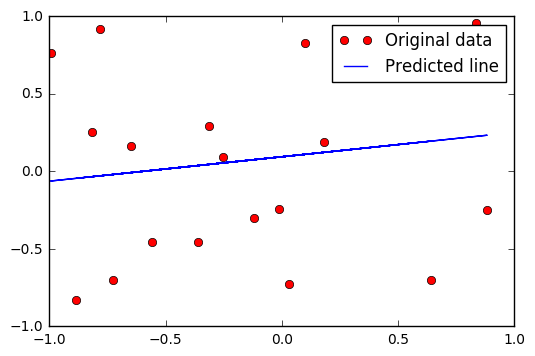

In [14]:
#Start training
with tf.Session() as sess:
    sess.run(init)
    
    #Fit all training data
    for epoch in range(training_epochs):
        for (X,Y) in zip(x_train, y_train):
            sess.run(my_optimizer, feed_dict={x: X, y: Y})
            
        #Dislay logs per epoch step
        if (epoch+1) % display_steps == 0:
            c = sess.run(loss, feed_dict={x: x_train, y: y_train})
            print('Epoch: %04d' % (epoch+1), 'loss= {:.9f}'.format(c), 'W= ', sess.run(W), 'b= ', sess.run(b))
    
    print('Training Finished!!!')
    training_loss = sess.run(loss, feed_dict={x: x_train, y: y_train})
    print('Training Loss: ', training_loss, 'W= ', sess.run(W), 'b= ', sess.run(b))
    
    #Plot display
    plt.plot(x_train, y_train, 'ro', label='Original data')
    plt.plot(x_train, sess.run(W)*x_train+sess.run(b), label='Predicted line')
    plt.legend()
    plt.show()